# Keras ile CIFAR10 üzerinde Resim sınıflandırma

Kütüphaneleri yüklüyoruz

In [2]:
from __future__ import print_function

import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
from keras.utils import np_utils
from keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import helper

Using TensorFlow backend.


Arka planda tensorflow kullanıldığı bilgisini verdi

Arka planda hangi kütüphanenin çalışacağını home/.keras/keras.json dosyasından değiştirebilirsiniz 
not:tensorflow arkada otomatik gpuyu kullanıyor ama theano için ayar gerekli

Veri Setimizi yüklüyoruz

In [3]:
if K.backend()=='tensorflow':
            K.set_image_dim_ordering("th")

In [4]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

Yapay sinir eğitimi sırasında çok büyük sayılarla uğraşmamak için 
giriş değerlerini küçültüyoruz 0-255 değerlerinden  0.0-1.0 değerler arasına indiriyoruz
Not:RGB en yüksek değer 255 en küçük ise 0

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

Eğitim ve Test için olan çıkış verilerini sınıflar arasında bağ kuruyoruz , böylelikle tahmin ederken direk sınıfını elde edebiliriz

In [6]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

Modelimizi yazıyoruz

In [7]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, 32, 32)
else:
    input_shape = (32, 32, 3)
            

In [8]:
        model = Sequential()
        #CNN mimarisi kabaca iki kısımdan oluşur 1. kısım özellik çıkarma 2. kısım ise öğrenme ve tahmin etme
        
        #1.kısım
       
        #convolutional katmanını ekliyoruz
        #Model görecelidir
        #convolutional katmanı gelen resme rastgele filtreler uygulayarak resmin özelliklerini daha belirgin yapar özellik haritaları oluşturur
        #burada ilk 32 parametresi 32 adet filtre uygulanacağını belirtir kernel_size ise filtrenin matris boyutunu verir
        #Not:input_shape ilk katmanlarda tanımlanması gerekir 
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        #MaxPooling resimin özelliklerini kaybetmeden küçültme işlemidir
        #pool_size parametresi resmi 2*2 matrislerle maxpooling uygular
        #Not:normalde 1 kare yana kayarak resme uygulanır ama strike parametresiyle kayma miktarının belirtilir
        #Not:Maxpooling işlemi yaparken resim küçültüleceği için bir formül kullanılır
        #Not:formül=(resim matrisi-filtre matrisi)/pool_size +1
        model.add(MaxPooling2D(pool_size=(2, 2)))
        #Dropout katmanı ağın ezberlemesini önlemek için eğitim sırasında rastgele nöronları iptal eder
        #parametre olarak aldığı değer 0.25 demek %25 iptal edeceği anlamına geliyor 
        model.add(Dropout(0.25))

        model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        #2.kısım
        #Flatten katmanı çıkarılan özellik haritalarını(matrisleri) öğrenmek/tahmin için dizi haline getirir(düzleştirir)
        model.add(Flatten())
        #Dense klasik yapay sinir ağı katmanıdı
        #Öğrenme için Giriş katmanımızdır
        model.add(Dense(1024, activation='relu'))
        model.add(Dropout(0.5))
        #çıkış katmanımızdır yani 10 adet sınıfımız olduğu için 10 tane eleman vardır
        #Not:Bazı yerlerde çıkış katmanın aktivasyon fonksiyonu softmax olması gerektiği söyleniyor
        model.add(Dense(10, activation='softmax'))

Modelimizi ayağa kaldırıyoruz

In [9]:
model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=0.0001, decay=1e-6),
                  metrics=['accuracy'])

eğitim

In [10]:
baslangic = time.time()
gecmis=model.fit(X_train, Y_train, epochs=50, batch_size=128)
son = time.time()
print ("Model %0.2f saniyede eğitildi"%(son - baslangic))

Epoch 1/50
50000/50000 [==============================] - 1021s - loss: 1.9635 - acc: 0.2644  
Epoch 2/50
50000/50000 [==============================] - 1008s - loss: 1.6271 - acc: 0.3960  
Epoch 3/50
50000/50000 [==============================] - 1000s - loss: 1.4850 - acc: 0.4531  
Epoch 4/50
50000/50000 [==============================] - 988s - loss: 1.3924 - acc: 0.4919   
Epoch 5/50
50000/50000 [==============================] - 980s - loss: 1.3273 - acc: 0.5203   
Epoch 6/50
50000/50000 [==============================] - 974s - loss: 1.2686 - acc: 0.5441   
Epoch 7/50
50000/50000 [==============================] - 973s - loss: 1.2203 - acc: 0.5628   
Epoch 8/50
50000/50000 [==============================] - 969s - loss: 1.1723 - acc: 0.5832   
Epoch 9/50
50000/50000 [==============================] - 964s - loss: 1.1313 - acc: 0.5979   
Epoch 10/50
50000/50000 [==============================] - 966s - loss: 1.0948 - acc: 0.6125   
Epoch 11/50
50000/50000 [========================

Ağın değerlendirilmesi kendi test verisiyle

In [11]:
scores = model.evaluate(X_test,Y_test)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

10000/10000 [==============================] - 95s    
Loss: 0.611
Accuracy: 0.789


In [12]:
def accuracy(test_x, test_y, model):
        result = model.predict(test_x)
        predicted_class = np.argmax(result, axis=1)
        true_class = np.argmax(test_y, axis=1)
        num_correct = np.sum(predicted_class == true_class) 
        accuracy = float(num_correct)/result.shape[0]
        return (accuracy * 100)

In [13]:
print ("Test verisi üzerinde doğruluk değeri: Yüzde- %0.2f"% accuracy(X_test, Y_test, model))

Test verisi üzerinde doğruluk değeri: Yüzde- 78.95


Modelimizin Özeti

In [14]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 30, 30)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 28, 28)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 14, 14)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 14, 14)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 12, 12)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 6, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 4, 4)         147584    
__________

In [15]:
def veri_ozet():
        if K.backend()=='tensorflow':
            K.set_image_dim_ordering("th")
        from keras.datasets import cifar10
        (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
        num_train, img_channels, img_rows, img_cols =  X_train.shape
        
        sinif_sayisi = len(np.unique(Y_train))
        
        sinif_isimleri = ['ucak','otomobil','kus','kedi','geyik',
                       'kopek','kurbağa','at','gemi','kamyon']
        
        fig = plt.figure(figsize=(8,3))
        for i in range(sinif_sayisi):
            ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
            idx = np.where(Y_train[:]==i)[0]
            features_idx = X_train[idx,::]
            img_num = np.random.randint(features_idx.shape[0])
            im = np.transpose(features_idx[img_num,::], (1, 2, 0))
            ax.set_title(sinif_isimleri[i])
            plt.imshow(im)
        plt.show()

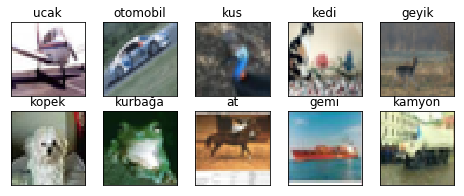

In [16]:
veri_ozet()

TEST Bölümü

Dışardaki verilerden test

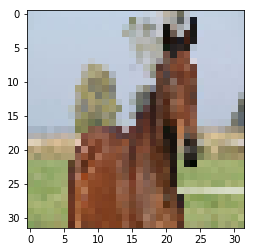

1/1 [==============================] - 0s
Tahmin: [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]
Tahmin sınıfı: [7]
0.jpg


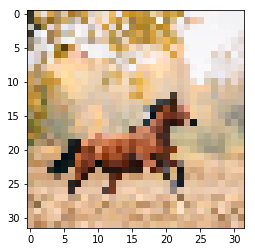

1/1 [==============================] - 0s
Tahmin: [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
Tahmin sınıfı: [9]
1.jpg


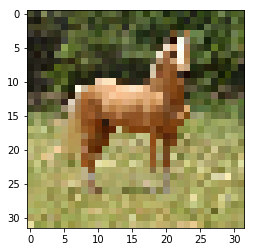

1/1 [==============================] - 0s
Tahmin: [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]
Tahmin sınıfı: [7]
2.jpg


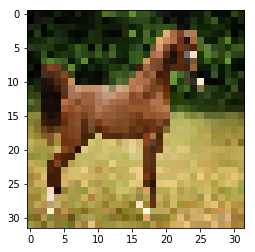

1/1 [==============================] - 0s
Tahmin: [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]
Tahmin sınıfı: [7]
3.jpg


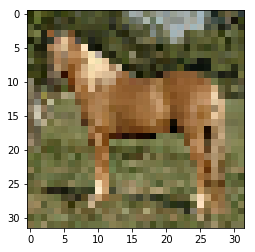

1/1 [==============================] - 0s
Tahmin: [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]
Tahmin sınıfı: [7]
4.jpg


In [34]:
import os
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from matplotlib import pyplot as plt

sinif_isimleri = ['ucak','otomobil','kus','kedi','geyik',
                       'kopek','kurbağa','at','gemi','kamyon']
klasor = "./test/at"
dosya=os.listdir(klasor)
for i in dosya:
    img_path = klasor+'/'+i
    img = image.load_img(img_path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    plt.imshow(img)
    plt.show()
    preds = model.predict(x)
    pp=model.predict_classes(x)
    print('Tahmin:', preds)
    print('Tahmin sınıfı:', pp)
    print(i)

Test verisinde rastgele test

In [27]:
import random
from scipy.misc import toimage
from matplotlib import pyplot
rdn=10
for i in range(10):
    
    X=X_test[i]
    Y=Y_test[i]
    a=X.reshape(1,3,32,32)
    sonuc=model.predict(a)
    print("Tahmin")
    print(sonuc)
    sonuc1=model.predict_classes(a)
    print(sonuc1)
    print("Doğru Sonuc",Y)

Tahmin
[[  3.66458989e-04   4.63536999e-04   5.00827469e-03   9.26665306e-01
    2.10651336e-03   5.26707470e-02   9.22364835e-03   6.01504114e-04
    2.84341048e-03   5.06355682e-05]]
1/1 [==============================] - 0s
[3]
Doğru Sonuc [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
Tahmin
[[  1.68129615e-02   2.91898757e-01   1.80894876e-05   8.83518442e-06
    8.71849181e-07   1.99416348e-07   7.41189467e-07   5.66245774e-07
    6.87893689e-01   3.36528127e-03]]
1/1 [==============================] - 0s
[8]
Doğru Sonuc [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Tahmin
[[  7.83575885e-03   4.02102992e-03   4.89865888e-05   4.56215239e-05
    1.13877950e-05   9.52390928e-06   1.08932145e-05   6.43778685e-06
    9.86005008e-01   2.00536009e-03]]
1/1 [==============================] - 0s
[8]
Doğru Sonuc [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Tahmin
[[  9.27000046e-01   3.52175161e-02   3.10030160e-03   9.26856359e-04
    7.95607339e-04   1.81227351e-05   5.61429533e-06   3.81101636e-0

Uygulanan filtreler

(1, 1, 32, 30, 30)
(32, 30, 30)
(30, 30, 32)


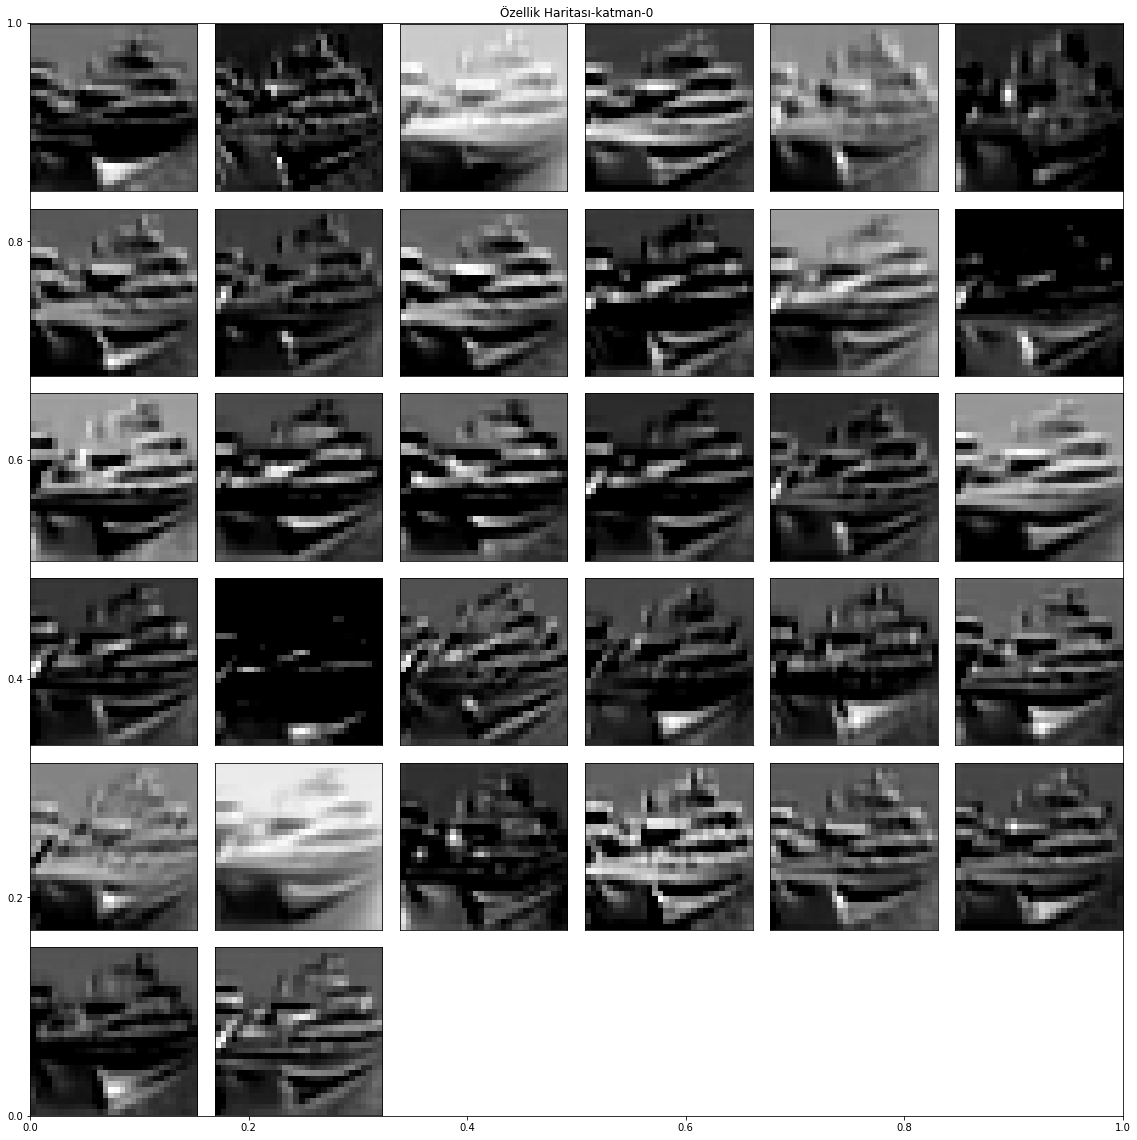

In [19]:
import helper
test_image=X_test[1]
a=test_image.reshape(1,3,32,32)
helper.filtre_goster(model,1,a)

Tahminlerin Görsel olarak Sınıflandırılması

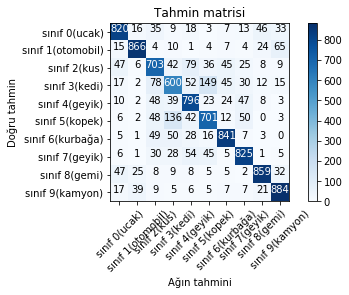

In [20]:
import helper
tum_sonuc = model.predict(X_test)
ts = np.argmax(tum_sonuc, axis=1)
helper.tahmin_matrisi(Y_test,ts)

Tahmin verilerinin gösterimi

In [21]:
print(gecmis.history)

{'loss': [1.9635366024398804, 1.6270511067962647, 1.4849990369415282, 1.3923569997787475, 1.3272668671035766, 1.2685991653442383, 1.2202988766098022, 1.1722594607925414, 1.1313197574234009, 1.0947769441604613, 1.0641232115936279, 1.0296863833618164, 1.0089127504348754, 0.97823482776641846, 0.95333404357910156, 0.93335433853149419, 0.91206694385528564, 0.8912863150215149, 0.86964996200561528, 0.85070792646408078, 0.83259968999862666, 0.81874193756103519, 0.80009543302536013, 0.78264001735687261, 0.76940318027496335, 0.75449629320144651, 0.74518655231475828, 0.7290374667358398, 0.72064290927886965, 0.70878668607711792, 0.69297404827117914, 0.68827954380035405, 0.68271961589813235, 0.66433899358749393, 0.65447297124862669, 0.6483546288490295, 0.63332609290122988, 0.62621975130081176, 0.61489067642211914, 0.6034809075927734, 0.59718519422531124, 0.59201654485702515, 0.58578761682510372, 0.57939878265380862, 0.56937851522445682, 0.56207786048889163, 0.55320007003784177, 0.54622997704505916,

Modelin yapısı

In [22]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 30, 30)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 28, 28)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 14, 14)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 14, 14)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 12, 12)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 6, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 4, 4)         147584    
__________

True

Modelli kaydetmek

In [24]:
from keras.models import model_from_json
from keras.models import load_model
##model tamamı 
model_json = model.to_json()
with open("saved_modeller/basit.json", "w") as json_file:
    json_file.write(model_json)
#sadece ağırlıklar    
model.save_weights("saved_modeller/basit_agirlik.h5")


## tamamının Yüklenmesi
json_file = open('saved_modeller/basit.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
##sadece ağırlıkların yüklenmesi
loaded_model.load_weights("saved_modeller/basit_agirlik.h5")

##modelin tamaamı
model.save('saved_modeller/basit.h5')
loaded_model=load_model('saved_modeller/basit.h5')